https://www.kaggle.com/georgesaavedra/covid19-dataset

In [25]:
import pandas as pd
data_set = pd.read_csv('owid-covid-data.csv', header=0, sep=',')
data_set.head(7)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


1. Hvilken måned var der flest smittede af corona for hvert land (location)?

In [153]:
import datetime
import calendar

data_set['date'] = pd.to_datetime(data_set['date'])

def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year,month)[1])
    return datetime.datetime(year, month, day)

lowest_possible_date = min(data_set['date'])
highest_possible_date = max(data_set['date'])

start_date = lowest_possible_date
end_date = add_months(start_date, 1)
summerised_by_month = pd.DataFrame()

while end_date < highest_possible_date:
  month = data_set[(data_set['date'] >= start_date) & (data_set['date'] < end_date)]
  month = month.groupby('location', as_index=False )['new_cases'].sum()
  month['date'] = str(start_date.year) + '-' + str(start_date.month)
  
  summerised_by_month = summerised_by_month.append(month)
  
  start_date = add_months(start_date, 1)
  end_date = add_months(end_date, 1)
  

excluded_locations = ['World','High income','Europe','European Union','North America','Upper middle income', 'Asia', 'Lower middle income', 'South America']
summerised_by_month = summerised_by_month[~summerised_by_month['location'].isin(excluded_locations)].sort_values(by=['new_cases'], ascending=False).drop_duplicates(['location'])
summerised_by_month.head(1)

,location,new_cases,date
219,United States,20174146.0,2022-1


2. Hvilket land i europa har test flest personer pr. tusinde indbyggere (total_tests_per_thousand), siden juli 2021 til nu?

In [152]:
test_per_thousand = data_set[data_set['date'] >= datetime.datetime(2021,7,1)]
test_per_thousand = test_per_thousand[['location','total_tests_per_thousand']].dropna()
test_per_thousand = test_per_thousand.sort_values(by='total_tests_per_thousand', ascending=False)
test_per_thousand = test_per_thousand.drop_duplicates('location')
test_per_thousand.head(1)

,location,total_tests_per_thousand
39088,Cyprus,29001.016


3. Vis en graph af de ti lande med flest døde til dags dato.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

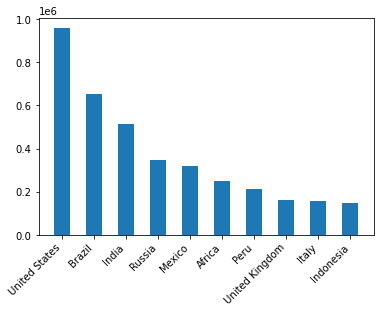

In [174]:
import matplotlib.pyplot as plt

most_dead = data_set[['location','total_deaths']].dropna()
most_dead = most_dead[~most_dead['location'].isin(excluded_locations)].sort_values(by='total_deaths', ascending=False).drop_duplicates('location')
plt.bar(most_dead.iloc[:10,0], most_dead.iloc[:10,1], width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

4. Vælg tre lande og vis udviklingen af døde i forhold til total antal smittede i procent fra d. 1 april 2020 til dags dato."

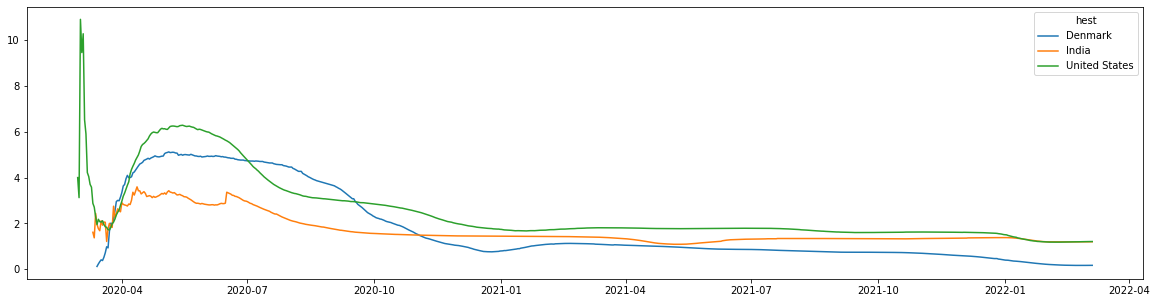

In [228]:
plt.rcParams["figure.figsize"] = (20,5)

countries = ['Denmark','India','United States']

dead_to_infected = data_set[['location','total_deaths','total_cases', 'date']].dropna()
dead_to_infected = dead_to_infected[dead_to_infected['location'].isin(countries)]
dead_to_infected['percent'] = dead_to_infected['total_deaths'].div(dead_to_infected['total_cases']) * 100

for i in countries:
  country = dead_to_infected[dead_to_infected['location'] == i] 
  plt.plot(country['date'],country['percent'],label=i)
plt.legend(title='Country')
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]